# Numerical Simulations of Markov Processes

This notebook explores two types of continuous-time Markov processes: the **Poisson Process** and the **Birth-Death Process**. We simulate their behavior using two different numerical methods and analyze key properties like distributions and absorption times.

### Required Libraries
First, we import the necessary Python libraries for numerical operations, plotting, and statistical functions.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Question 1: Poisson Process Simulation

We consider a Poisson process $N_t$ with an event rate of $\alpha = 0.5$ and an initial state of $N_0 = 0$.

## Part (a) & (b): Discretized-Time Method

This method approximates the continuous process by dividing time into small, discrete intervals of size `dt`. In each interval, an event (a "jump") occurs with a probability of $\alpha \times dt$.

### (a) 10 Trajectories using Discretized-Time Method
We simulate and plot 10 sample paths of the process over the time interval $[0, 10]$.

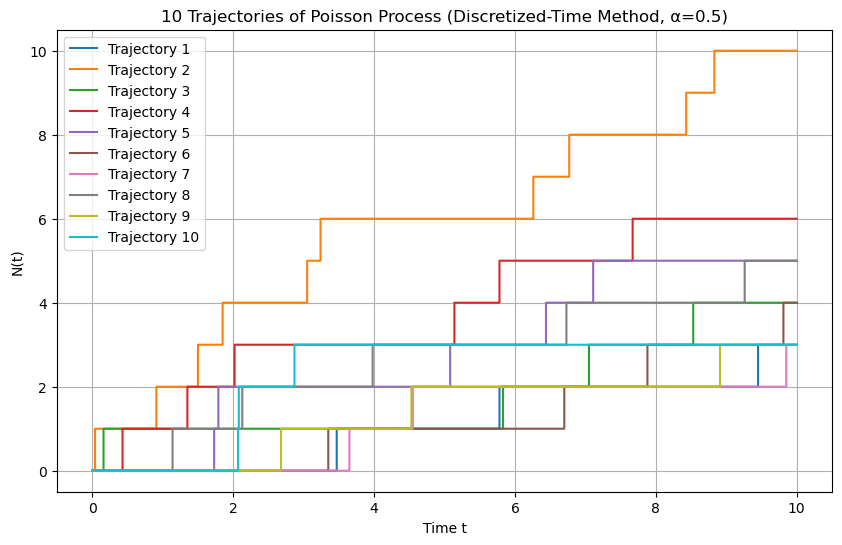

In [15]:
# --- Parameters ---
alpha = 0.5
T = 10
dt = 0.01
times = np.arange(0, T + dt, dt)
num_trajectories = 10

# --- Simulation ---
N = np.zeros((num_trajectories, len(times)), dtype=int)
for traj in range(num_trajectories):
    for t in range(1, len(times)):
        # Attempt a jump with probability alpha * dt
        if np.random.rand() < alpha * dt:
            N[traj, t] = N[traj, t-1] + 1
        else:
            N[traj, t] = N[traj, t-1]

# --- Plotting ---
plt.figure(figsize=(10, 6))
for traj in range(num_trajectories):
    plt.step(times, N[traj], where='post', label=f'Trajectory {traj+1}')

plt.xlabel('Time t')
plt.ylabel('N(t)')
plt.title('10 Trajectories of Poisson Process (Discretized-Time Method, α=0.5)')
plt.legend()
plt.grid(True)
plt.show()

### (b) Histogram of N(10) using Discretized-Time Method

To analyze the distribution of $N_{10}$, we run a large number of simulations (100,000) and plot a histogram of the final counts. We then compare this empirical distribution to the theoretical Poisson distribution with parameter $\lambda = \alpha T = 0.5 \times 10 = 5$.

Theoretical mean = 5.000, Empirical mean = 4.997
Theoretical variance = 5.000, Empirical variance = 4.941
Mean error = 0.003, Variance error = 0.059


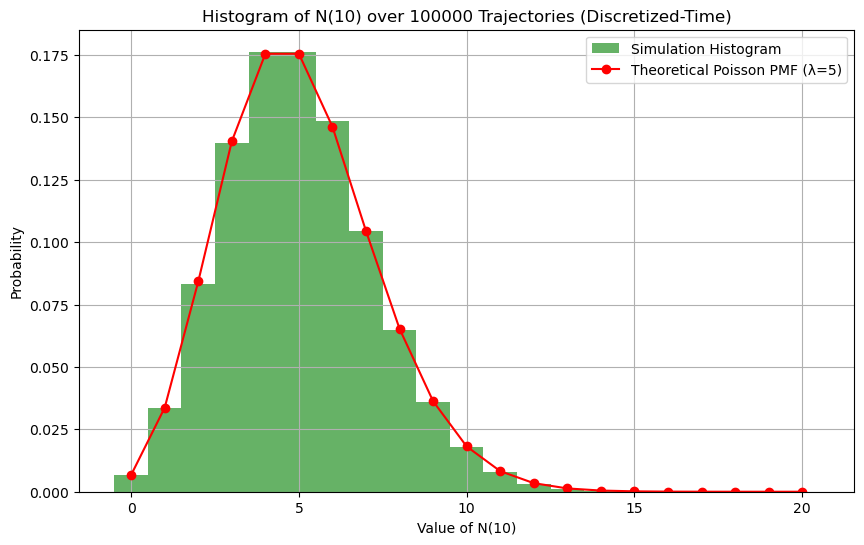

In [16]:
# --- Parameters ---
alpha = 0.5
T = 10
dt = 0.01
times = np.arange(0, T + dt, dt)
num_trajectories_hist = 100000

# --- Simulation ---
N10_arr_discrete = []
for traj in range(num_trajectories_hist):
    N10 = 0
    for t in range(1, len(times)):
        if np.random.rand() < alpha * dt:
            N10 += 1
    N10_arr_discrete.append(N10)

# --- Analysis and Plotting ---
N10_arr_discrete = np.array(N10_arr_discrete)
emp_mean = np.mean(N10_arr_discrete)
emp_var = np.var(N10_arr_discrete)

lambda_T = alpha * T
theo_mean = lambda_T
theo_var = lambda_T

print(f"Theoretical mean = {theo_mean:.3f}, Empirical mean = {emp_mean:.3f}")
print(f"Theoretical variance = {theo_var:.3f}, Empirical variance = {emp_var:.3f}")
print(f"Mean error = {abs(emp_mean - theo_mean):.3f}, Variance error = {abs(emp_var - theo_var):.3f}")

plt.figure(figsize=(10, 6))
bins = range(max(N10_arr_discrete) + 2)
plt.hist(N10_arr_discrete, bins=bins, density=True, alpha=0.6, color='g', align='left', label='Simulation Histogram')

k_values = np.arange(0, max(N10_arr_discrete) + 1)
plt.plot(k_values, poisson.pmf(k_values, lambda_T), 'ro-', label='Theoretical Poisson PMF (λ=5)')

plt.xlabel('Value of N(10)')
plt.ylabel('Probability')
plt.title(f'Histogram of N(10) over {num_trajectories_hist} Trajectories (Discretized-Time)')
plt.legend()
plt.grid(True)
plt.show()

## Part (c) & (d): Random-Jump-Time (Gillespie) Method

This is an exact simulation method where the waiting time $\tau$ between consecutive events is a random variable drawn from an exponential distribution with rate $\alpha$. This avoids the approximation error inherent in the discretized-time method.

### (c) 10 Trajectories using Random-Jump-Time Method

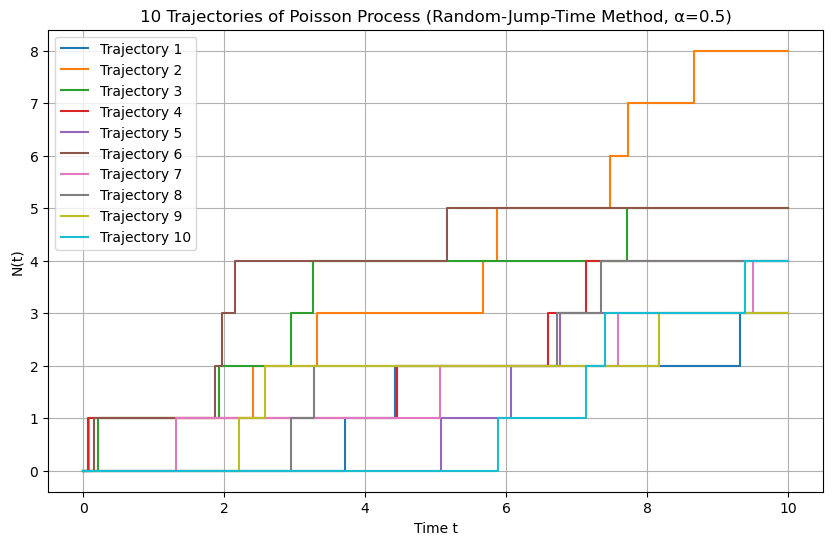

In [17]:
# --- Parameters ---
alpha = 0.5
T = 10
num_trajectories = 10

# --- Simulation and Plotting ---
plt.figure(figsize=(10, 6))
for traj in range(num_trajectories):
    t = 0
    N = 0
    times = [t]
    counts = [N]
    
    while t < T:
        tau = np.random.exponential(1 / alpha)  # Draw waiting time from Exp(α)
        t += tau
        if t > T:
            break
        N += 1
        times.append(t)
        counts.append(N)
    
    # Add a final point at t=T for consistent plotting
    times.append(T)
    counts.append(N)
    
    plt.step(times, counts, where='post', label=f'Trajectory {traj+1}')

plt.xlabel('Time t')
plt.ylabel('N(t)')
plt.title('10 Trajectories of Poisson Process (Random-Jump-Time Method, α=0.5)')
plt.legend()
plt.grid(True)
plt.show()

### (d) Histogram of N(10) using Random-Jump-Time Method

We repeat the histogram analysis using the more accurate random-jump-time method and compare it to the theoretical Poisson PMF.

Theoretical mean = 5.000, Empirical mean = 5.000
Theoretical variance = 5.000, Empirical variance = 5.022
Mean error = 0.000, Variance error = 0.022


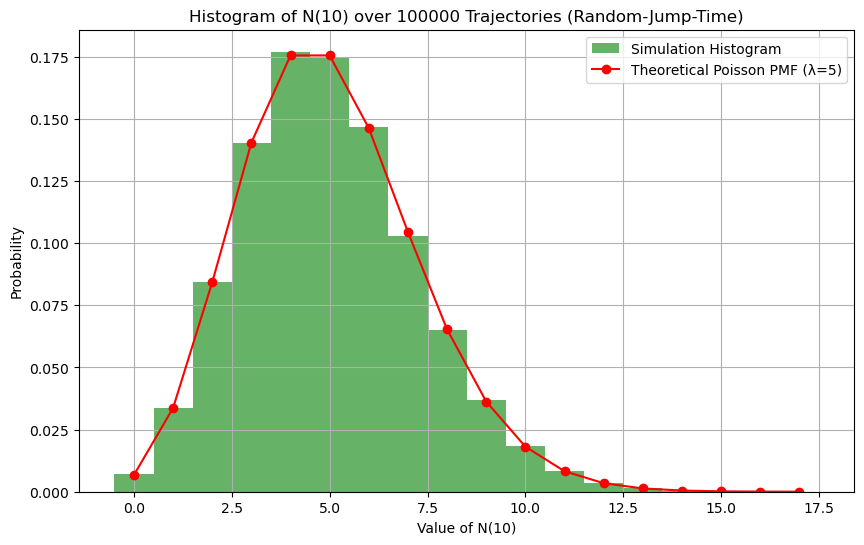

In [18]:
# --- Parameters ---
alpha = 0.5
T = 10
num_trajectories_hist = 100000

# --- Simulation ---
N10_arr_jump = []
for traj in range(num_trajectories_hist):
    t = 0
    N = 0
    while t < T:
        tau = np.random.exponential(1 / alpha)
        t += tau
        if t > T:
            break
        N += 1
    N10_arr_jump.append(N)

# --- Analysis and Plotting ---
N10_arr_jump = np.array(N10_arr_jump)
emp_mean = np.mean(N10_arr_jump)
emp_var = np.var(N10_arr_jump)

lambda_T = alpha * T

print(f"Theoretical mean = {lambda_T:.3f}, Empirical mean = {emp_mean:.3f}")
print(f"Theoretical variance = {lambda_T:.3f}, Empirical variance = {emp_var:.3f}")
print(f"Mean error = {abs(emp_mean - lambda_T):.3f}, Variance error = {abs(emp_var - lambda_T):.3f}")

plt.figure(figsize=(10, 6))
bins = range(max(N10_arr_jump) + 2)
plt.hist(N10_arr_jump, bins=bins, density=True, alpha=0.6, color='g', align='left', label='Simulation Histogram')

k_values = np.arange(0, max(N10_arr_jump) + 1)
plt.plot(k_values, poisson.pmf(k_values, lambda_T), 'ro-', label='Theoretical Poisson PMF (λ=5)')

plt.xlabel('Value of N(10)')
plt.ylabel('Probability')
plt.title(f'Histogram of N(10) over {num_trajectories_hist} Trajectories (Random-Jump-Time)')
plt.legend()
plt.grid(True)
plt.show()

## Part (e): Comparison of Methods

* **Accuracy**: The **Random-Jump-Time method** is an exact simulation method. It generates waiting times from the true underlying exponential distribution, so the resulting trajectories and distributions are statistically exact. The **Discretized-Time method** is an approximation that introduces a small error. The accuracy depends on `dt`; a smaller `dt` leads to a better approximation but requires more computational steps.

* **Efficiency**: The Random-Jump-Time method is event-driven. It only performs a calculation when a jump occurs. This makes it highly efficient, especially when the event rate `α` is low (i.e., jumps are infrequent). Conversely, the Discretized-Time method must iterate through every small time step `dt`, even when no events occur, making it computationally intensive and inefficient for low event rates.

# Question 2: Birth-Death Process with Absorption

We now simulate a birth-death process $X_t$ with a birth rate $\alpha = 0.5$ per individual, a death rate $\beta = 1.0$ per individual, and an absorbing state at $X=0$.

## Part (a): Simulating Trajectories to Absorption

We generate 20 trajectories starting from an initial population $X_0 = 10$. Each simulation runs until the population reaches the absorbing state of 0. The plot confirms that once $X(t)=0$, the process remains there.

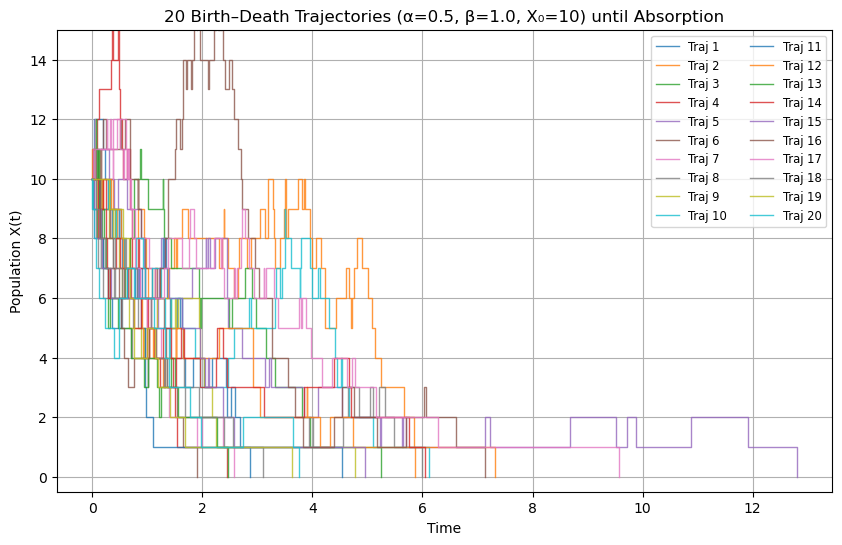

Absorption times (when X(t) reached 0) for each trajectory:
[ 2.85942441  5.86837407  5.24453864  2.44250816 12.80158943  1.89837531
  2.56764491  5.99732828  4.77054276  6.11257757  4.54037086  7.31976327
  2.45944555  6.04181688  4.95959906  7.13120934  9.56921111  3.10311747
  3.63474723  3.7600749 ]
Mean absorption time ≈ 5.154, median ≈ 4.865


In [19]:
# --- Parameters ---
alpha = 0.5
beta = 1.0
X0 = 10
num_trajectories = 20

# --- Simulation and Plotting ---
plt.figure(figsize=(10, 6))
absorption_times = []

for traj in range(num_trajectories):
    t = 0.0
    n = X0
    times = [0.0]
    counts = [n]
    
    while n > 0:
        rate_birth = alpha * n
        rate_death = beta * n
        r = rate_birth + rate_death
        tau = np.random.exponential(1.0 / r)
        t += tau
        
        if np.random.rand() < rate_birth / r:
            n += 1  # Birth
        else:
            n -= 1  # Death
            
        times.append(t)
        counts.append(n)

    absorption_times.append(times[-1])
    plt.step(times, counts, where='post', label=f'Traj {traj+1}', linewidth=1.0, alpha=0.8)

plt.xlabel('Time')
plt.ylabel('Population X(t)')
plt.title(f'20 Birth–Death Trajectories (α={alpha}, β={beta}, X₀={X0}) until Absorption')
plt.ylim(-0.5, X0 + 5)
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

# --- Summary Statistics ---
print("Absorption times (when X(t) reached 0) for each trajectory:")
print(np.array(absorption_times))
print(f"Mean absorption time ≈ {np.mean(absorption_times):.3f}, median ≈ {np.median(absorption_times):.3f}")

## Part (b): Probability of Extinction by a Given Time

We use a Monte Carlo simulation to estimate the probability that the process reaches the absorbing state 0 within the time interval $[0, 10]$, starting from $X_0 = 5$. This is $P(T_0 \le 10 | X_0 = 5)$.

In [20]:
# --- Parameters ---
alpha = 0.5
beta = 1.0
T_max = 10.0
X0_prob = 5
num_trajectories_prob = 100000

# --- Simulation ---
extinct_count = 0
for traj in range(num_trajectories_prob):
    t = 0.0
    X = X0_prob
    
    while t < T_max and X > 0:
        rate = X * (alpha + beta)
        tau = np.random.exponential(1 / rate)
        t += tau
        
        if t > T_max:
            break
        
        if np.random.rand() < alpha / (alpha + beta):
            X += 1  # Birth
        else:
            X -= 1  # Death
            
    if X == 0:
        extinct_count += 1

# --- Result ---
p_est = extinct_count / num_trajectories_prob
print(f"Estimated P(T₀ ≤ 10 | X₀={X0_prob}): {p_est:.4f}")
print(f"Out of {num_trajectories_prob} trajectories, {extinct_count} reached extinction before t=10.")

Estimated P(T₀ ≤ 10 | X₀=5): 0.9823
Out of 100000 trajectories, 98231 reached extinction before t=10.


## Part (c): Expected Time to Absorption

Here, we estimate the expected time to absorption (extinction) for a process starting with an initial population of $X_0 = 10$. This is $E[T_{10}]$.

Monte Carlo samples: 20000
Estimated E[T_abs | X₀=10] = 4.6338


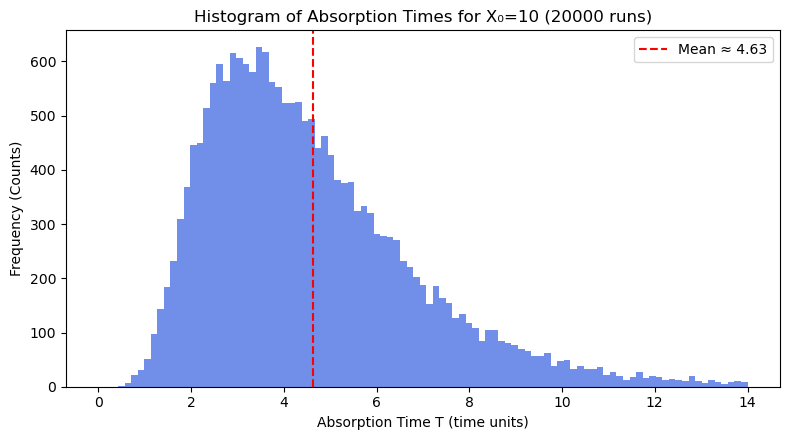

In [21]:
# --- Parameters ---
np.random.seed(12345)
alpha = 0.5
beta = 1.0
X0_exp = 10
num_trajectories_exp = 20000
absorption_times_exp = np.empty(num_trajectories_exp, dtype=float)

# --- Simulation ---
for i in range(num_trajectories_exp):
    t = 0.0
    X = X0_exp
    while X > 0:
        rate = X * (alpha + beta)
        tau = np.random.exponential(1.0 / rate)
        t += tau
        if np.random.rand() < alpha / (alpha + beta):
            X += 1
        else:
            X -= 1
    absorption_times_exp[i] = t

# --- Analysis and Plotting ---
mean_abs_time = np.mean(absorption_times_exp)
print(f"Monte Carlo samples: {num_trajectories_exp}")
print(f"Estimated E[T_abs | X₀={X0_exp}] = {mean_abs_time:.4f}")

plt.figure(figsize=(8, 4.5))
# Cap the bins to show the main mass of the distribution
max_bin = int(min(np.percentile(absorption_times_exp, 99.5), 200))
bins = np.linspace(0, max_bin, 100)
plt.hist(absorption_times_exp, bins=bins, density=False, alpha=0.75, color='royalblue')
plt.xlabel('Absorption Time T (time units)')
plt.ylabel('Frequency (Counts)')
plt.title(f'Histogram of Absorption Times for X₀={X0_exp} ({num_trajectories_exp} runs)')
plt.axvline(mean_abs_time, color='red', linestyle='--', label=f'Mean ≈ {mean_abs_time:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

## Part (d): Expected Absorption Time vs. Initial Population

Finally, we repeat the experiment from Part (c) for a range of initial populations, $X_0 = 1, 2, ..., 20$, to observe how the expected time to absorption changes as a function of the starting population.

Running simulations for different initial populations...
X₀ = 1, Estimated E[absorption time] = 2.568
X₀ = 2, Estimated E[absorption time] = 4.112
X₀ = 3, Estimated E[absorption time] = 5.068
X₀ = 4, Estimated E[absorption time] = 5.976
X₀ = 5, Estimated E[absorption time] = 6.630
X₀ = 6, Estimated E[absorption time] = 7.404
X₀ = 7, Estimated E[absorption time] = 8.113
X₀ = 8, Estimated E[absorption time] = 8.484
X₀ = 9, Estimated E[absorption time] = 8.957
X₀ = 10, Estimated E[absorption time] = 9.360
X₀ = 11, Estimated E[absorption time] = 9.714
X₀ = 12, Estimated E[absorption time] = 9.967
X₀ = 13, Estimated E[absorption time] = 10.381
X₀ = 14, Estimated E[absorption time] = 10.895
X₀ = 15, Estimated E[absorption time] = 10.980
X₀ = 16, Estimated E[absorption time] = 11.268
X₀ = 17, Estimated E[absorption time] = 11.440
X₀ = 18, Estimated E[absorption time] = 11.817
X₀ = 19, Estimated E[absorption time] = 11.972
X₀ = 20, Estimated E[absorption time] = 12.262


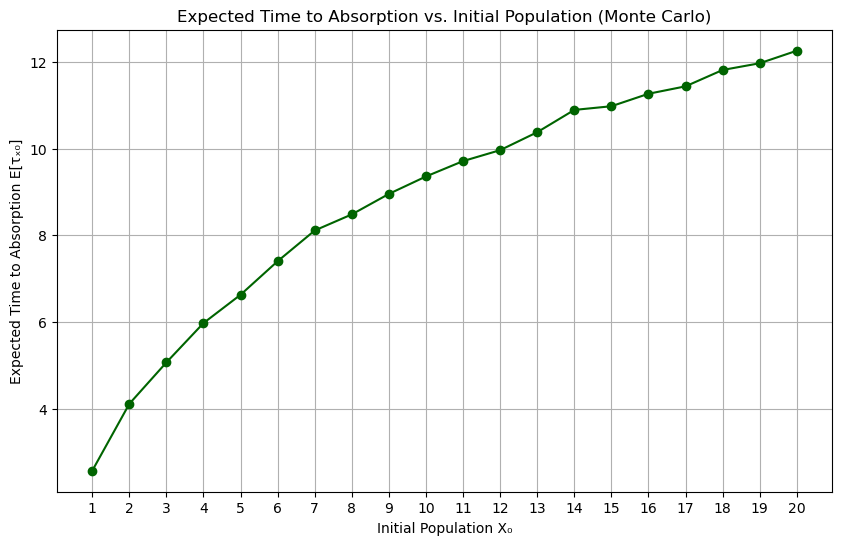

In [23]:


def simulate_absorption_time(X0, lambda_rate, mu_rate):
    """
    Simulates one trajectory of the birth-death process until absorption at 0.
    Returns the total time to absorption.
    """
    X = X0
    time = 0.0
    
    while X > 0:
        rate = (lambda_rate + mu_rate) * X
        # Draw waiting time from an exponential distribution
        delta_t = np.random.exponential(1 / rate)
        time += delta_t
        
        # Decide if the event is a birth or a death
        if np.random.rand() < lambda_rate / (lambda_rate + mu_rate):
            X += 1  # Birth
        else:
            X -= 1  # Death
            
    return time

def estimate_expected_absorption_time(X0, lambda_rate, mu_rate, num_simulations):
    """
    Estimates E[absorption time] for a given X0 using Monte Carlo.
    """
    times = [simulate_absorption_time(X0, lambda_rate, mu_rate) for _ in range(num_simulations)]
    return np.mean(times)


# --- Main Simulation Parameters ---
lambda_rate = 0.5
mu_rate = 0.7       # Using the mu from your notebook's last cell
num_simulations_per_X0 = 5000
X0_values = np.arange(1, 21)
T_abs_values = []

# --- Simulation Loop ---
print("Running simulations for different initial populations...")
for X0 in X0_values:
    T_est = estimate_expected_absorption_time(X0, lambda_rate, mu_rate, num_simulations_per_X0)
    T_abs_values.append(T_est)
    print(f"X₀ = {X0}, Estimated E[absorption time] = {T_est:.3f}")

# --- Plotting Results ---
plt.figure(figsize=(10, 6))
plt.plot(X0_values, T_abs_values, marker='o', linestyle='-', color='darkgreen')
plt.xlabel("Initial Population X₀")
plt.ylabel("Expected Time to Absorption E[τₓ₀]")
plt.title("Expected Time to Absorption vs. Initial Population (Monte Carlo)")
plt.xticks(X0_values)
plt.grid(True)
plt.show()